# Regresión usando Redes Neuronales y TensorFlow

## 1. Arquitectura típica de una regresión usando redes neuronales

Existen diferentes formas de realizar regresión usando redes neuronales. La siguiente tabla muestra los elementos típicos de una red neuronal que realiza regresión.

| **Elemento** | **Valor típico** |
| --- | --- |
| Capa de entrada (tamaño) | Igual tamaño que el número de atributos  |
| Capa(s) Oculta(s) | Mínimo 1, máximo ilimitado |
| Neuronas por capa oculta | Generalmente entre 10 a 100 |
| Capa de salida (tamaño)  | Igual tamaño que la predicción deseada |

Algunos otros elementos son los siguientes:

| **Elemento** | **Valor típico** |
| --- | --- |
| Activación de la capa oculta | Usualmente ReLU (rectified linear unit) |
| Activación de la salida  | Puede ser ninguna, ReLU, sigmoidea, tanh |
| Función de pérdida | MSE (mean square error), MAE (mean absolute error) o una combinación MAE/MSE (si hay outliers) |
| Optimizador | SGD (stochastic gradient descent), Adam, etc. |

Los elementos anteriores son hiperparámetros del sistema. Los hiperparámetros son valores cualitativos o cuantitativos que se tiene que establecer de manera arbitraria (el sistema no los aprende). Por otro lado, los parámetros suelen ser aquellos valores que el modelo aprende al ser entrenado.

In [1]:
# Importar tensorflow
import tensorflow as tf

# Importar otras librerías
import numpy as np
import matplotlib.pyplot as plt

# Verificar la versión de tensorflow
print(tf.__version__)

2.8.0


## 2. Datos de entrenamiento


In [2]:
# Atributos (entradas)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Etiquetas (salidas)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

print(X)
print(y)

# tamaño de los tensores creados
print(X.shape)
print(y.shape)

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float32)
tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32)
(8,)
(8,)


In [3]:
# Atributos (entradas)
X = np.arange(-100, 100, 4)
# Etiquetas (salidas)
y = X + 10

print(X)
print(y)

[-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56   60   64
   68   72   76   80   84   88   92   96]
[-90 -86 -82 -78 -74 -70 -66 -62 -58 -54 -50 -46 -42 -38 -34 -30 -26 -22
 -18 -14 -10  -6  -2   2   6  10  14  18  22  26  30  34  38  42  46  50
  54  58  62  66  70  74  78  82  86  90  94  98 102 106]


### 2.1 Separación de datos en entrenamiento y prueba

Una de las etapas más comunes consiste en crear un conjunto de entrenamiento (train) y de prueba (test). En algunos casos se puede utilizar, además, un conjunto de validación. Cada cojunto cumple una función específica:

* **Conjunto de entrenamiento** - el modelo se entrena utilizando estos datos, los cuales on usualmente entre el 70-80% del total disponible.
* **Conjunto de validación** - el modelo se sintoniza con estos datos, y son típicamente el 10-15% del total disponible.
* **Conjunto de prueba** - el modelo se evalúa en estos datos para ver qué fue lo que aprendió. Usualmente comprende 10-15% del total de los datos dispoonibles.

Por facilida, por ahora solo se utilizará en conjunto de entrenamiento y el de prueba. Ambos se pueden crear separando X, y.

In [4]:
# Conjunto de entrenamiento (80%)
X_train = X[:40]
y_train = y[:40]

# Conjunto de prueba (20%)
X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### 2.2 Visualización de los datos

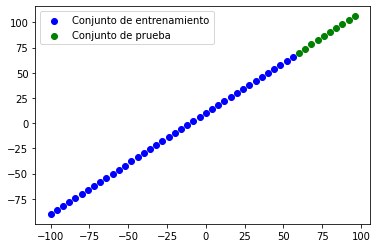

In [5]:
# plt.figure(figsize=(10, 7))

# Conjunto de entrenamiento (azul)
plt.scatter(X_train, y_train, c='b', label='Conjunto de entrenamiento')

# Conjunto de prueba (verde)
plt.scatter(X_test, y_test, c='g', label='Conjunto de prueba')

# Mostrar la leyenda
plt.legend()

In [6]:
# Adecuar el tamaño de X a lo requerido por tensorflow
# Xtf = tf.expand_dims(X, axis=-1)    # Adecúa la entrada a 2 dimensiones
# Xtf.shape

## 3. Modelamiento

En TensorFlow hay 3 pasos fundamentales para crear y entrenar un modelo.

1. **Crear el modelo** - consiste en crear las capas de una red neuronal usando el API [funcional](https://www.tensorflow.org/guide/keras/functional) o [secuencial](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)). Igualmente se puede importar un modelo previamente construido ("transfer learning")

2. **Compilar el modelo** - consiste en definir cómo se va a medir el rendimiento del modelo (métricas, función de pérdida), así como en definir cómo va a mejorarse el modelo (usando algún otimizador). 

3. **Entrenar el modelo** - consiste en dejar que el modelo encuentre patrones en los datos (cómo las entradas se usan para generar las salidas). 

Aquí se utilizará el API secuencial de [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) para construir el modelo de regresión.


### 3.1 Creación y compilación del modelo

In [7]:
# Establecer una semilla aleatoria
tf.random.set_seed(42)

# Crear un modelo con 1 sola capa densa cuyo tamaño de entrada es 1 (si no se 
# especifica el tamaño, Keras trata de inferirlo)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1])
])

# Compilar el modelo
model.compile(loss = tf.keras.losses.mae,            # MAE como función de pérdida
              optimizer = tf.keras.optimizers.SGD(), # SGD como optimizador
              metrics = ["mae"])

Se puede visualizar la estructura del modelo usando `summary()`, que muestra las capas que contiene, el tamaño de las salidas y el número de parámetros.

* **Total params** - número total de parámetros del modelo
* **Trainable parameters** - parámetros que son actualizados al entrenar el modelo.
* **Non-trainable parameters** - parámetros que no son actualizados durante el entrenamiento (usualmente en transfer learning).

In [8]:
# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


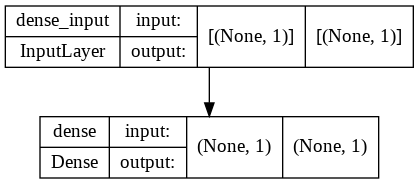

In [9]:
# Vista en 2D del modelo
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### 3.2 Entrenamiento del modelo

In [10]:
# Se utilizará únicamente 5 épocas
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
2/2 [==============================] - 1s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/5
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/5
2/2 [==============================] - 0s 7ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/5
2/2 [==============================] - 0s 10ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/5
2/2 [==============================] - 0s 8ms/step - loss: 10.1677 - mae: 10.1677


In [11]:
# Predicciones para el conjunto de entrenamiento
y_pred_train = model.predict(X_train)
y_pred_train[1:5]

array([[-94.98138 ],
       [-91.02113 ],
       [-87.0609  ],
       [-83.100655]], dtype=float32)

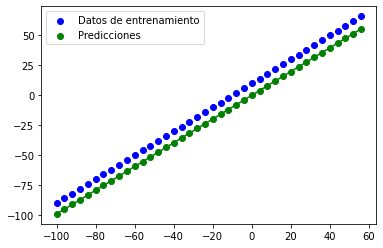

In [12]:
# plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Datos de entrenamiento")
plt.scatter(X_train, y_pred_train, c="g", label="Predicciones")
plt.plot(X_train, y_pred_train, c="g")
plt.legend();

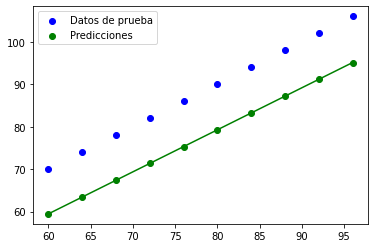

In [13]:
# Predicciones para el conjunto de prueba
y_pred_test = model.predict(X_test)

# Visualizacióon
plt.scatter(X_test, y_test, c="b", label="Datos de prueba")
plt.scatter(X_test, y_pred_test, c="g", label="Predicciones")
plt.plot(X_test, y_pred_test, c="g")
plt.legend();

## 4. Evaluación de la prediccióon

Algunas de las dos métricas más utilizadas para problemas de regresión son:

* **Mean absolute error (MAE)** - promedio de la diferencia entre cada predicción.
* **Mean squared error (MSE)** - error cuadrático medio de las prediccioones

También se puede utilizar [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate), que retorna la pérdida del modelo así como otras métricas especificadas durante el entrenamiento.

In [14]:
# Evaluación en el conjunto de prueba
ev = model.evaluate(X_test, y_test)

print(ev)

1/1 [==============================] - 0s 134ms/step - loss: 10.7109 - mae: 10.7109
[10.710948944091797, 10.710948944091797]


In [15]:
# Cálculo del MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred_test.squeeze())
print("MAE:", mae)

# Cálculo del MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred_test.squeeze())
print("MSE:", mse)

MAE: tf.Tensor(10.710949, shape=(), dtype=float32)
MSE: tf.Tensor(114.73747, shape=(), dtype=float32)


In [16]:
# Cálculo del MAE usando funciones de tensorflow
tf.reduce_mean(tf.abs(y_test-y_pred_test.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=10.710949325561524>

## 5. Mejora del modelo

Para mejorar el modelo se modificará algunos de los hiper parámetros utilizados anteriormente. A continuación se indica qué se puede modificar en cada etapa.

1. **Creación del modelo** - se puede añadir más capas, incrementar el número de neuronoas ocultas en cada capa, modificar las funciones de activación de cada capa.
2. **Compilación del modelo** - se puede utilizar otra función de optimización o modificar el factor de aprendizaje ("learning rate").
3. **Entrenamiento del modelo** - se puede utilizar más épocas (pasadas completas por los datos) o incrementar el número de datos.

Aquí se entrenará tres modelos y se comparará los resultados.

**a. Modelo 1**

Este modelo solo tiene una capa y es entrenado usando 100 épocas

In [17]:
tf.random.set_seed(42)

# Similar al modeloo original
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, input_shape=[1])
])

# Compilación del modelo
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# Entrenamiento: usando 100 épocas
model_1.fit(X_train, y_train, epochs=100, verbose=0);  # Verbose=0 elimina la salida

MAE: 18.745327 
MSE: 353.57336


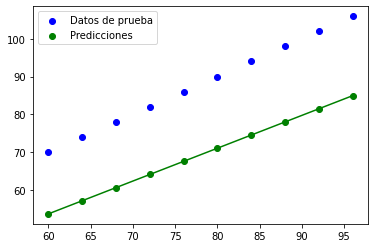

In [18]:
# Predicciones
y_preds_1 = model_1.predict(X_test)

# Métricas
mae_1 = tf.metrics.mean_absolute_error(y_test, y_preds_1.squeeze())
mse_1 = tf.metrics.mean_squared_error(y_test, y_preds_1.squeeze())
print("MAE:", mae_1.numpy(), "\nMSE:", mse_1.numpy())

# Visualización
plt.scatter(X_test, y_test, c="b", label="Datos de prueba")
plt.scatter(X_test, y_preds_1, c="g", label="Predicciones")
plt.plot(X_test, y_preds_1, c="g")
plt.legend();

**b. Modelo 2**

Se añadirá otra capa densa (modelo con 2 capas), manteniendo todo lo demás constante.

In [19]:
tf.random.set_seed(42)

# Modelo con 2 capas
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, input_shape=[1]),
                               tf.keras.layers.Dense(1)
])

# Compilación del modelo
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# Entrenamiento
model_2.fit(X_train, y_train, epochs=100, verbose=0);

MAE: 1.9098114 
MSE: 5.459232


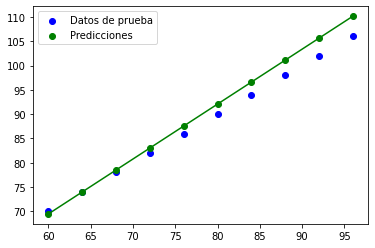

In [20]:
# Predicciones
y_preds_2 = model_2.predict(X_test)

# Métricas
mae_2 = tf.metrics.mean_absolute_error(y_test, y_preds_2.squeeze())
mse_2 = tf.metrics.mean_squared_error(y_test, y_preds_2.squeeze())
print("MAE:", mae_2.numpy(), "\nMSE:", mse_2.numpy())

# Visualización
plt.scatter(X_test, y_test, c="b", label="Datos de prueba")
plt.scatter(X_test, y_preds_2, c="g", label="Predicciones")
plt.plot(X_test, y_preds_2, c="g")
plt.legend();

**c. Modelo 3**

Se mantendrá todo como en el modelo_2, pero se entrenará por más tiempo (500 épocas)

In [21]:
tf.random.set_seed(42)

# Similar a model_2
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, input_shape=[1]),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# Entrenamiento: usando 500 épocas
model_3.fit(X_train, y_train, epochs=500, verbose=0);

MAE: 68.68786 
MSE: 4804.4717


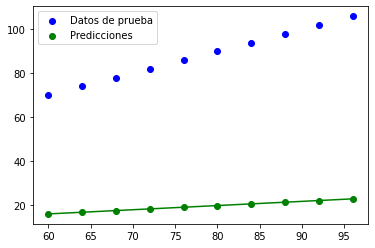

In [22]:
# Predicciones
y_preds_3 = model_3.predict(X_test)

# Métricas
mae_3 = tf.metrics.mean_absolute_error(y_test, y_preds_3.squeeze())
mse_3 = tf.metrics.mean_squared_error(y_test, y_preds_3.squeeze())
print("MAE:", mae_3.numpy(), "\nMSE:", mse_3.numpy())

# Visualización
plt.scatter(X_test, y_test, c="b", label="Datos de prueba")
plt.scatter(X_test, y_preds_3, c="g", label="Predicciones")
plt.plot(X_test, y_preds_3, c="g")
plt.legend();

### Comparación de resultados

In [23]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mae_3.numpy()]]

In [24]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,68.687859


## 6. Almacenamiento y Carga de un Modelo

En un modelo de TensorFlow/Keras se puede almacenaar un modelo usando [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Hay dos maneras de almacenar un modelo en TensorFlow:
1. El formato [SavedModel](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. El formato [HDF5](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

La diferencia principal entre ambos es que el SavedModel autoomáticamente puede almacenar objetos personalizados (como capas especiales) sin modificaciones al cargar el modelo.

### 6.1. Almacenamiento

In [27]:
# Almacenar un modelo utilizando el formato SavedModel
model_2.save('mejor_modelo_SavedModel')

INFO:tensorflow:Assets written to: mejor_modelo_SavedModel/assets


In [28]:
# Verificar el modelo (archivo protobuf .pb)
!ls mejor_modelo_SavedModel

assets	keras_metadata.pb  saved_model.pb  variables


Now let's save the model in the HDF5 format, we'll use the same method but with a different filename.

In [29]:
# Almacenar el modelo usando formato HDF5
model_2.save("mejor_modelo_HDF5.h5")

In [30]:
# Verificar el modelo
!ls mejor_modelo_HDF5.h5

mejor_modelo_HDF5.h5


## 6.2. Carga de un modelo

Se puede caargar un modelo grabado usando el método [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model).

El cargar un modelo para SavedModel o HDF5 se realiza de la misma manera

In [31]:
# Carga de un model a partir de un formato SavedModel
modelo_nuevo = tf.keras.models.load_model("mejor_modelo_SavedModel")
modelo_nuevo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Comparación de los dos modelos (el cargado y el que se tiene en este notebook)
model_2_preds = model_2.predict(X_test)
modelo_nuevo_preds = modelo_nuevo.predict(X_test)

# Comparando el MAE no debería haber errores
tf.metrics.mean_absolute_error(y_test, modelo_nuevo_preds.squeeze()).numpy() == tf.metrics.mean_absolute_error(y_test, model_2_preds.squeeze()).numpy()

True

*Carga del modelo en HDF5:*

In [42]:
modelo_h5 = tf.keras.models.load_model("mejor_modelo_HDF5.h5")
modelo_h5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Comparación de ambos modelos
modelo_h5_preds = modelo_h5.predict(X_test)

tf.metrics.mean_absolute_error(y_test, modelo_h5_preds.squeeze()).numpy() == tf.metrics.mean_absolute_error(y_test, model_2_preds.squeeze()).numpy()

True

**Descarga del modelo (de Google Colab)**

Se puede utilizar cualquiera de las dos opciones siguientes:
* Hacer click derecho en el archivo y seleccionar'download'.
* Utilizar el siguiente código

In [44]:
from google.colab import files

files.download("mejor_modelo_HDF5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>